# 2.5 Regresión lineal

## Funciones en python

In [22]:
import numpy as np #Librería numérica
import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
from sklearn.linear_model import LinearRegression #Regresión Lineal con scikit-learn
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
#%matplotlib inline # Si quieres hacer estos gráficos dentro de un jupyter notebook

def linear_regression(x, y):

    regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
    x = x.reshape(-1,1)
    # instruimos a la regresión lineal que aprenda de los datos (x,y)
    regresion_lineal.fit(x, y) 

    r_sq = regresion_lineal.score(x, y)
    print('coefficient of determination:', r_sq)

    print(f'Regresión lineal: y = {regresion_lineal.coef_[0]:3f}x + {regresion_lineal.intercept_:3f}')
    
    f_lin = lambda x: regresion_lineal.coef_[0]*x + regresion_lineal.intercept_
    
    ##******************************
    y_pred = regresion_lineal.predict(x)
    print('Predicted response99:', y_pred, sep='\n')
    
    # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
    mse = mean_squared_error(y_true = y, y_pred = y_pred)
    # La raíz cuadrada del MSE es el RMSE
    rmse = np.sqrt(mse)
    print('Error Cuadrático Medio (MSE) = ' + str(mse))
    print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
    ##******************************
    
    xi = np.linspace(np.min(x),np.max(x),1001)
    plt.plot(x, y,'o')
    plt.plot(xi, f_lin(xi),'-')
    plt.title('Regresión Lineal')
    plt.show()


def linear_regression_sin(x, y):  
    sum_xi = np.sum(x)
    sum_xi_2 = np.sum(x**2)
    sum_yi = np.sum(y)
    sum_xiyi = np.sum(x*y)
    print(f'sum_xi: {sum_xi:.3f}, sum_xi_2: {sum_xi_2:.3f}')
    print(f'sum_yi: {sum_yi:.3f}, sum_xiyi: {sum_xiyi:.3f}')
    a = np.array([[sum_xi_2, sum_xi],
                [sum_xi, len(x)]])
    b = np.array([sum_xiyi ,sum_yi])
    solve = np.linalg.solve(a, b)
    print(f'Solución del sistema: {solve}')
    print(f'Regresión lineal: y = {solve[0]:.3f}x + {solve[1]:.3f}')


    f_lin = lambda x: solve[0]*x + solve[1]
    #grafica
    xi = np.linspace(np.min(x),np.max(x),1001)
    plt.plot(x, y,'o')
    plt.plot(xi, f_lin(xi),'-')
    plt.show()



La regresión lineal es una técnica paramétrica de machine learning. Con «paramétrica» queremos decir que incluso antes de mirar a los datos, ya sabemos cuántos parámetros (o coeficientes) vamos a necesitar.

En el caso que estemos usando una sola variable, $x$, sabemos que una línea necesita 2 parámetros. La fórmula para la regresión lineal con una sola variable $x$ es:

$$
y=wx+b
$$

El aprendizaje consiste en encontrar cuáles son los mejores parámetros (coeficientes) para los datos que tengamos. Los mejores coeficientes serán los que minimicen alguna medida de error. Para la regresión lineal usaremos el error cuadrático medio.

### Ejemplo de Regresión Lineal


<img src="imagenes/regresion_lineal.png" title="Title text"/>

*Imagen de la pagína [www.iartificial.net](https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/)*

Hemos usado una regresión lineal para encontrar los parámetros de la línea que minimiza el error de los datos que tenemos. El proceso de aprendizaje consiste en estimar los parámetros $w$ y $b$. Así nos queda que para estos datos, los mejores valores son: 

$$
 w=0.0918
 b=1.2859
$$

así que nos queda:

$$
    y=0.0918x+1.2859
$$

Podemos usar este modelo de regresión lineal para estimar cuáles serán los resultados para otros valores de $x$. Por ejemplo, si queremos saber el resultado para $x = 5$, usaremos el modelo anterior y veremos que el resultado es 1.7449:

$$
    y=0.0918⋅5+1.2859=1.7449
$$

Este es un ejemplo muy simple. En realidad, los problemas de machine learning tienen muchas más variables. Sin embargo, he escogido este ejemplo porque es muy fácil de visualizar, explicar y entender. Espero que la intuición de este ejemplo sirva para entender lo que está pasando cuando haya más variables.


Antes de explicar el método de los mínimos cuadrados para resolver regresiones lineales, tenemos que expandir la notación. Debemos tener en cuenta que normalmente, tendremos muchas variables.

Con una variable, la ecuación para la regresión lineal es:
$$
y = wx + b
$$

Por conveniencia, vamos a reescribir la ecuación anterior:
$$
y = b + wx
$$
Cuando tengamos un dato con N variables, llamaremos al dato X. También tenemos que expandir los parámetros W para que cada parámetro vaya con una variable:
$$
X = [x_0, x_1, x_2, ..., x_N] \\ W = [w_0, w_1, w_2, ..., w_N]
$$
nos queda una expresión equivalente a la original. Podemos ver que:
$$
y = b + wx = w_0 x_0 + w_1 x_1
$$
 
Para el caso general, la ecuación lineal quedaría:

$$
y = WX
$$
usando el producto matricial. Si tienes la multiplicación de matrices un poco oxidada, la versión intuitiva sería:

$$
y = w_0 x_0 + w_1 x_1 + w_2 x_2 + ... + w_N x_N
$$

### Formato de los datos

Para que la técnica de regresión lineal pueda aprender de nuestros datos, tenemos que proporcionar los resultados y en forma de vector de M elementos, y los datos de entrada X en forma de matrix. El convenio para la matriz $X$ es el siguiente:

- $M$ filas: cada fila es un dato (por ejemplo, un inmueble, si queremos predecir su valor de venta)
- $N$ columnas: cada columna es un atributo relevante (por ejemplo, cuántas habitaciones tiene, metros cuadrados, etc).

### Aprendizaje: El método de los mínimos cuadrados
​
El proceso de aprendizaje consiste en averiguar qué parámetros $W$ minimizan el error cuadrático medio entre los resultados reales y los estimados.

El método de los mínimos cuadrados proporciona una solución analítica. Es decir, nos da una fórmula para obtener la mejor estimación posible de $W$ para los datos de entrada y resultados que hemos proporcionado. La fórmula es la siguiente:

$$
\hat{W} = (X^T X)^{-1} X^T y
$$

En la práctica hay librerías numéricas que calculan automáticamente la mejor estimación de $W$ por nosotros. Ya veremos algún ejemplo práctico del cálculo de regresión lineal.

De momento, sólo quería indicar que dependiendo de la cantidad de datos y atributos, puede ser una operación costosa computacionalmente hablando. Fíjate que hay que transponer matrices, multiplicar matrices e invertir matrices. Todo ello muy costoso computacionalmente para grandes cantidades de datos.


### Ejemplo práctico 1

Primero vamos a generar unos datos que siguen una línea, y le añadimos ruido gaussiano. Para ello usaremos la librería de python NumPy. La fórmula que he usado para generar los datos es:
$$
y = 0.1x + 1.25 + N(0, 0.2)
$$

Utilizando la libreria LinearRegression
coefficient of determination: 0.8943593637683117
Regresión lineal: y = 0.091835x + 1.285879
Predicted response99:
[1.28587925 1.33179686 1.37771447 1.42363208 1.46954969 1.5154673
 1.56138491 1.60730252 1.65322013 1.69913774 1.74505534 1.79097295
 1.83689056 1.88280817 1.92872578 1.97464339 2.020561   2.06647861
 2.11239622 2.15831383 2.20423144 2.25014905 2.29606666 2.34198426
 2.38790187 2.43381948 2.47973709 2.5256547  2.57157231 2.61748992
 2.66340753 2.70932514 2.75524275 2.80116036 2.84707797 2.89299558
 2.93891318 2.98483079 3.0307484  3.07666601]
Error Cuadrático Medio (MSE) = 0.03318522012927899
Raíz del Error Cuadrático Medio (RMSE) = 0.18216810952875093


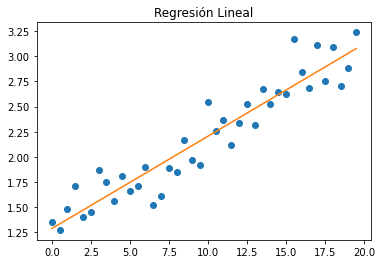

****************************************
Sin utilizando la libreria LinearRegression
sum_xi: 390.000, sum_xi_2: 5135.000
sum_yi: 87.251, sum_xiyi: 973.067
Solución del sistema: [0.09183522 1.28587925]
Regresión lineal: y = 0.092x + 1.286


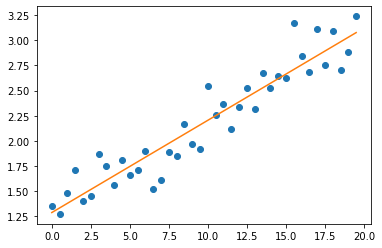

****************************************


In [23]:
f = lambda x: 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])

np.random.seed(42) # para poder reproducirlo
#f = lambda x: 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
x = np.arange(0, 20, 0.5) # generamos valores x de 0 a 20 en intervalos de 0.5
y = f(x) # calculamos y a partir de la función que hemos generado

print("Utilizando la libreria LinearRegression")
linear_regression(x, y)
print("****************************************")
print("Sin utilizando la libreria LinearRegression")
linear_regression_sin(x, y)
print("****************************************")